In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
X = df.drop('target', axis=1)
y = df['target']

In [6]:
X = X.values
y = y.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [8]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [10]:
torch.manual_seed(41)
model = Model()

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [12]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162346482276917
Epoch: 30 and loss: 0.5859931111335754
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794710755348206
Epoch: 60 and loss: 0.1796349436044693
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651284456253
Epoch: 90 and loss: 0.06522615253925323


Text(0.5, 0, 'Epoch')

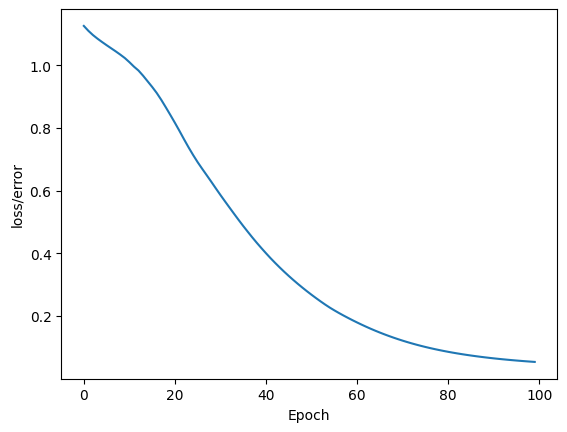

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [14]:
with torch.no_grad(): 
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [15]:
loss

tensor(0.1315)

In [16]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
    
    if y_val.argmax().item() == y_test[i]:
      correct +=1

    print(f'We got {correct} correct!')

1.)  tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
We got 1 correct!
2.)  tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
We got 2 correct!
3.)  tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
We got 3 correct!
4.)  tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
We got 4 correct!
5.)  tensor([-7.1838,  4.8757,  8.3024]) 	 2 	 2
We got 5 correct!
6.)  tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
We got 6 correct!
7.)  tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
We got 7 correct!
8.)  tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
We got 8 correct!
9.)  tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
We got 9 correct!
10.)  tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
We got 10 correct!
11.)  tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
We got 11 correct!
12.)  tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
We got 12 correct!
13.)  tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
We got 13 correct!
14.)  tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
We got 14 correct!
15.)  tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
We

In [17]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [18]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [19]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [20]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9960,  4.5080,  6.6831])


In [21]:
torch.save(model.state_dict(), 'my_model.pt')

In [22]:
new_model = Model()
new_model.load_state_dict(torch.load('my_model.pt'))

<All keys matched successfully>

In [23]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)